<a href="https://colab.research.google.com/github/aakhavi/Machine-Learning-in-Python/blob/main/GSB_545_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arash Akhavi
# Lab 4: Boosting
# 4/21/2022

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where

# Clean Data

In [ ]:
# read in data
data = pd.read_csv("/content/drive/MyDrive/GSB 545 Data/heart_2020_cleaned.csv")
# create dummy variables 
data = pd.get_dummies(data, columns = ['Sex', 'Race', 'AgeCategory', 'GenHealth'], prefix = '', prefix_sep = '')
# change Yes/No to binary 
data['HeartDisease'] = data['HeartDisease'].map({'Yes': 1, 'No': 0})
data['Smoking'] = data['Smoking'].map({'Yes': 1, 'No': 0})
data['AlcoholDrinking'] = data['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
data['Stroke'] = data['Stroke'].map({'Yes': 1, 'No': 0})
data['DiffWalking'] = data['DiffWalking'].map({'Yes': 1, 'No': 0})
data['Diabetic'] = data['Diabetic'].map({'Yes': 1, 'No': 0})
data['PhysicalActivity'] = data['PhysicalActivity'].map({'Yes': 1, 'No': 0})
data['KidneyDisease'] = data['KidneyDisease'].map({'Yes': 1, 'No': 0})
data['Asthma'] = data['Asthma'].map({'Yes': 1, 'No': 0})
data['SkinCancer'] = data['SkinCancer'].map({'Yes': 1, 'No': 0})
#data[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'KidneyDisease', 'SkinCancer']] = data[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'KidneyDisease', 'SkinCancer']].map({'Yes': 1, 'No': 0})
#drop null values
data = data.dropna()
data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,60-64,65-69,70-74,75-79,80 or older,Excellent,Fair,Good,Poor,Very good
0,0,16.60,1,0,0,3.0,30.0,0,1.0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1.0,1,...,0,1,0,0,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0.0,1,...,0,0,0,0,0,0,0,0,0,1


# As we know this data set has extremely unbalanced classes there for we need to look into a way to balance them. Without balancing them we are getting an accuracy of around 90% with every type of boosting method. Upon researching undersampling methods we get a better understanding of what we need to do in order to get more accurate and balanced results. We want to make the No/Yes rows for Heart Disease more balanced by undersampling people who do not have heart disease.


# Prepare Data

In [ ]:
x = data.drop(['HeartDisease'],axis=1)
y = data['HeartDisease']

In [ ]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 283979, 1: 26476})


# Balance Data

In [ ]:
# define the undersampling method
# undersampling so we can get less of no heart disease to make distribution closer to 50/50 and work with smaller data set
undersample = NearMiss(version=1, n_neighbors=3)

In [ ]:
# transform the dataset
x, y = undersample.fit_resample(x, y)

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 26476, 1: 26476})


# Boosting Models

In [ ]:
# Create model
# Gradient Boost
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
n_scores_gradient = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise',)
n_scores_gradient_1 = cross_val_score(model, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise',)
n_scores_gradient_2 = cross_val_score(model, x, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise',)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_gradient), std(n_scores_gradient)))
print('Precision: %.3f (%.3f)' % (mean(n_scores_gradient_1), std(n_scores_gradient_1)))
print('Recall: %.3f (%.3f)' % (mean(n_scores_gradient_2), std(n_scores_gradient_2)))

Accuracy: 0.890 (0.004)
Precision: 0.948 (0.002)
Recall: 0.825 (0.008)


In [ ]:
# AdaBoost
AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=0.5,algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
n_scores_ada = cross_val_score(AdaBoost, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores_ada_1 = cross_val_score(AdaBoost, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
n_scores_ada_2 = cross_val_score(AdaBoost, x, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_ada), std(n_scores_ada)))
print('Precision: %.3f (%.3f)' % (mean(n_scores_ada_1), std(n_scores_ada_1)))
print('Recall: %.3f (%.3f)' % (mean(n_scores_ada_2), std(n_scores_ada_2)))

Accuracy: 0.881 (0.004)
Precision: 0.958 (0.002)
Recall: 0.796 (0.008)


In [ ]:
# XGBoost
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
n_scores_xgb = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise', )
n_scores_xgb_1 = cross_val_score(model, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise', )
n_scores_xgb_2 = cross_val_score(model, x, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise', )
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_xgb), std(n_scores_xgb)))
print('Precision: %.3f (%.3f)' % (mean(n_scores_xgb_1), std(n_scores_xgb_1)))
print('Recall: %.3f (%.3f)' % (mean(n_scores_xgb_2), std(n_scores_xgb_2)))

Accuracy: 0.891 (0.004)
Precision: 0.956 (0.002)
Recall: 0.819 (0.008)


# Compare Boosting Methods

In [ ]:
results = [n_scores_gradient, n_scores_ada, n_scores_xgb]
results_1 = [n_scores_gradient_1, n_scores_ada_1, n_scores_xgb_1]
results_2 = [n_scores_gradient_2, n_scores_ada_2, n_scores_xgb_2]
methods = ['Gradient Boosting', 'XGB', 'AdaBoost']

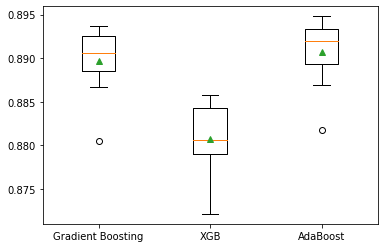

In [ ]:
# Compare Accuracy 
pyplot.boxplot(results, labels=methods, showmeans=True)
pyplot.show()

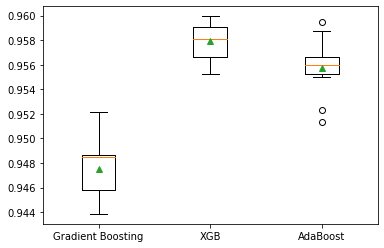

In [ ]:
# Compare Precision 
pyplot.boxplot(results_1, labels=methods, showmeans=True)
pyplot.show()

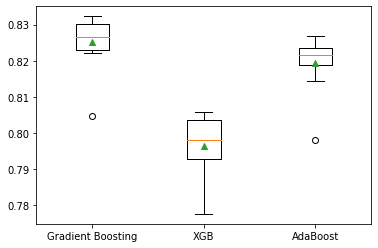

In [ ]:
# Compare Recall 
pyplot.boxplot(results_2, labels=methods, showmeans=True)
pyplot.show()

# The results are interesting. The AdaBoosting model has the highest accuracy, the gradient boosting model has the highest recall, and the XG boosting model has the highest precision. Since we are dealing with Heart Disease data I believe precision is the most important metric in this case. We want to make sure we are correctly classifying people who are going to have Heart Disease based on the features provided. Therefore, based on this analysis the best boosting model for predicting heart attacks based on precision is the XG boosting model. 

# Feature Importance

In [ ]:
# define the model
model = XGBClassifier()
# fit the model
model.fit(x, y)

XGBClassifier()

In [ ]:
# get importance
importance = model.feature_importances_

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00859
Feature: 1, Score: 0.01944
Feature: 2, Score: 0.01760
Feature: 3, Score: 0.05815
Feature: 4, Score: 0.14485
Feature: 5, Score: 0.07816
Feature: 6, Score: 0.12894
Feature: 7, Score: 0.05629
Feature: 8, Score: 0.08077
Feature: 9, Score: 0.01557
Feature: 10, Score: 0.03704
Feature: 11, Score: 0.03622
Feature: 12, Score: 0.02053
Feature: 13, Score: 0.00392
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00004
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.08886
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00008
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00246
Feature: 30, Score: 0.00040
Feature: 31, Score: 0.00018
Feature: 32, Score: 0.00924
Feature: 33, Score: 0.00513
Feature: 34, Score: 0.00659
Feature: 35, Score: 0.10993
Fe

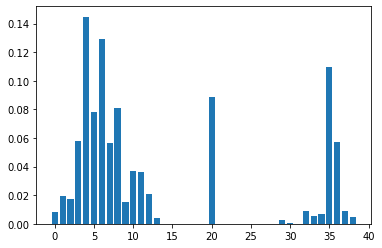

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# As shown above the most important features in the XG Boost model are: 4, 6, 20, 35. These features correspond to: Stroke, Mental Health, Race (Other), General Health (Excellent).

In [ ]:
# view columns
pd.set_option('max_columns', None)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Excellent,Fair,Good,Poor,Very good
0,0,16.60,1,0,0,3.0,30.0,0,1.0,1,5.0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0.0,1,7.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1.0,1,8.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0.0,0,6.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0.0,1,8.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
